## Learning Objectives

Today we focus on two issues that may have bothered you in the past:

1. Noise 
2. Error measure

We explain what they are and why they are important to machine learning.

## Review

Now we know how to learn. We come up with a hypothesis set and we try all members of that hypothesis set on the training data. We then take the best one and we return it, calling it our final hypothesis. We know that this hypothesis has some probability of doing well on real world data based on what we have seen last time. 

This is all well and good, but you probably want to see this in action, so let's do it below:

In [ ]:
%matplotlib inline
import seaborn as sns
import numpy as np

# here are our inputs
# notice we have X and y
X_train = np.array([0, 1, 2, 2, 3, 4, 5])
y_train = np.array([0, 1, 3, 4, 5, 5, 8])

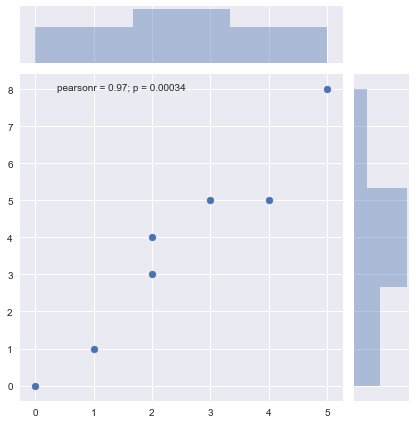

In [27]:
# remember we never just plot the whole distribution if we want a test
sns.jointplot(X_train, y_train)

In [28]:
# here are our hypothesis set
# notice these are functions
h0 = lambda x: x**2
h1 = lambda x: x + 2
h2 = lambda x: x + 1

In [29]:
# now we test how accurate our functions are on the real data
from sklearn.metrics import accuracy_score

for h in [h0, h1, h2]:
    preds = map(h, X_train)
    print accuracy_score(y_train, preds)

0.428571428571
0.285714285714
0.285714285714


And now since h0 was the most accurate we return it and pat ourselves on the back. Right?

Well there should be a couple of things that should feel off to you. First is that while the first hypothesis is the most accurate on the training data, it is highly unlikely that the true function is quadratic. So there seems to be something wrong with our error measure, accuracy.

And second, we see something really strange in the training data in general. We have two different values for x = 2. 

Let's deal with the second issue first (it should be quick)

## Noise 

We are finally call to bear a question that may have been bothering you since we first introduced supervised learning. And this is noise. The idea is that there is no perfect function out there that maps our data to the right outcomes. For example two people may have the exact same credit report and one will default and the other will pay back the loan. You can call it randomness (which I think is the right way to call it) or you can call it a lack of information (the credit report can't contian every facet of the person so we must account for as much by assuming noise). 

All this means is that the exact same X value can take on many y values in a dataset. And so if your mind we thinking r.v.'s then you were thinking right. The only difference is that the random function that we said exists now becomes a random function with noise. 

## Error Measures

Coming back to the first issue, this is one that is due careful consideration. The error measure that we have been using thusfar has been that of accuracy (% right), but this often does not make sense as a measure. In cases where you are only off by a smidge you will be considered just a wrong as being off by a ton. 

One of my favorite examples here is that of the fingerprint scanner. There are two ways that it can be wrong. The first is that it could say yes when it should say no and the second is that it could say no when it should say yes. And you can imigine different situtations where one would be worse than the other. 

For example the FBI would weight letting somebody in when they are not supposed to be in, as something really bad! In that case having that happen would reduce the score by a ton, whereas having a good guy scan her finger twice wouldn't matter so much, so that would not be as penalized.

There are many common error measures (in fact I have done another video on this), but let's explore two pretty common ones:

* MSE (mean squared error): The means that for each point your loss is the square of the difference between your predicted and your true y value
* MAE (mean absolute error): The means that for each point your loss is the absolute value of the difference between your predicted and your true y value

These are common error measures. One believes that an error is an error and that all errors should have equal weight (mae) the other says the big erros should be counted more. Let's evaluate our hypotheses!

In [31]:
# now we test how accurate our functions are on the real data
from sklearn.metrics import mean_squared_error, mean_absolute_error

for h in [h0, h1, h2]:
    preds = map(h, X_train)
    print 'ACC:', accuracy_score(y_train, preds)
    print 'MAE:', mean_absolute_error(y_train, preds)
    print 'MSE:', mean_squared_error(y_train, preds)
    print

ACC: 0.428571428571
MAE: 4.71428571429
MSE: 61.0

ACC: 0.285714285714
MAE: 1.0
MSE: 1.57142857143

ACC: 0.285714285714
MAE: 0.857142857143
MSE: 1.14285714286



Notice what happens, for the first error measure, h0 was the best, but for the other two h2 was the best one. 

A careful construction of the error measures to ensure that the error measure measures what you want your function to capture is paramount and will ultimately depend on your specific learning problem. The FBI will have different desires from a supermarket. And this is often one part of the data science curriculum that can't be taught.

## Back to the assumptions

let's view how our assumptions have changed:

In [ ]:
import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'

c0 = 'Unknown target function, f(X) = y + noise'
c1 = 'Inputs, (x_1, y_1), ..., (x_n, y_n)'
c2 = 'Learning Algorithm'
c3 = 'Hypothesis set, H'
c4 = 'Final Hypothesis, g(X) = y'
c5 = 'IID samples from a r.v. X'
c6 = 'Train set'
c7 = 'Test set'
c8 = 'Reported Hypothesis Performance'
c9 = 'Error Measure'

G = nx.DiGraph()
G.add_node(c0, color='orange')
G.add_node(c1)
G.add_edge(c0, c1)
G.add_node(c2)
G.add_node(c3)
G.add_edge(c3, c2)
G.add_node(c4)
G.add_edge(c2, c4)
G.add_node(c5)
G.add_edge(c5, c1)
G.add_node(c6)
G.add_node(c7)
G.add_edge(c1, c6)
G.add_edge(c1, c7)
G.add_edge(c6, c2)
G.add_edge(c7, c8)
G.add_edge(c4, c8)
G.add_node(c9, color='green')
G.add_edge(c9, c8)
G.add_edge(c9, c2)

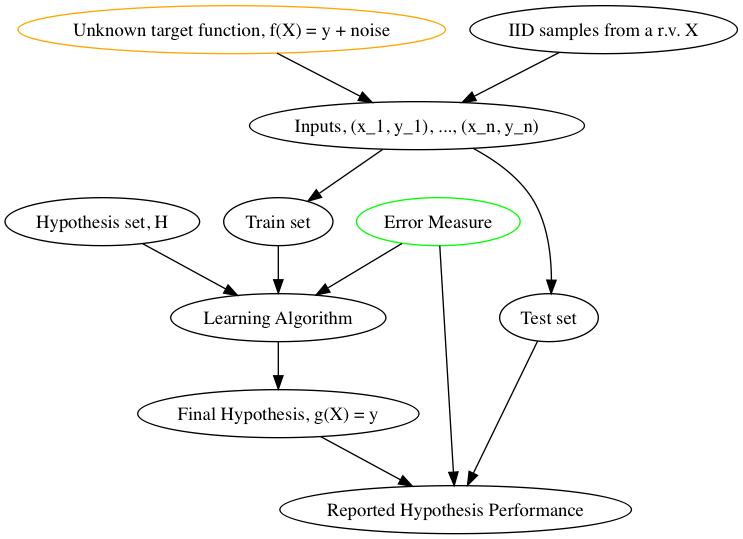

In [43]:
draw(G)

We edited the node in orange, we added the simple characters: + noise, but we added in the node in green which is the error measure. You can estimate any error measure and try to find the hypothesis that will minimize this error measure on real data, but what that error measure is you must choose. And quite the important choice it is! 

## Next time

Well congrats, we are done with the above diagram. These are all the assumptions that we are going to create, and you will see that this will cover a broad swath of research from statistics to machine learning. 

Next time we will talk about what happens when our hypothesis space is infinite and do a big review of all we have done by walking through another example in an infinite hypothesis space.

## Learning Objectives

Today we focus on two issues that may have bothered you in the past:

1. Noise 
2. Error measure

We explain what they are and why they are important to machine learning.

## Comprehension Questions

1.	Is there a universal best hypothesis for a specific train and test set?
2.	How do you choose your hypothesis set?
3.	What is the typical size of a hypothesis set?
4.	Where does noise come from?
5.	Would noise exist if we could measure everything?
6.	What would be good error measures for self driving cars? For networks generating art? For detecting cancer?
7.	What is the error measure for humans?
